In [10]:
from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier(BaseEstimator): # 상속
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        pred = np.zeros((x.shape[0],1))
        for i in range(x.shape[0]):
            if x['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
                
        return pred

In [11]:
from sklearn import preprocessing

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis = 1)
x_titanic_df = transform_features(x_titanic_df)
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state=0)

In [14]:
myclf = MyDummyClassifier()
myclf.fit(x_train, y_train)
mypred = myclf.predict(x_test)
print('더미 정확도:',accuracy_score(y_test, mypred))

더미 정확도: 0.7877094972067039


In [18]:
x_test.shape[0]

179

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print(confusion)
    print('정확도:', accuracy, '정밀도:',precision, '재현울:',recall)

In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis = 1)
x_titanic_df = transform_features(x_titanic_df)

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state =11)

lr_clf = LogisticRegression()

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test, pred)

[[104  14]
 [ 13  48]]
정확도: 0.8491620111731844 정밀도: 0.7741935483870968 재현울: 0.7868852459016393


C:\ProgramData\Anaconda3\envs\ssu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
pred_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)
print('pred_proba 결과:', pred_proba[:3])
print('shape:', pred_proba.shape)
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
print(pred_proba_result[:3])

pred_proba 결과: [[0.46162417 0.53837583]
 [0.87858538 0.12141462]
 [0.87723741 0.12276259]]
shape: (179, 2)
[[0.46162417 0.53837583 1.        ]
 [0.87858538 0.12141462 0.        ]
 [0.87723741 0.12276259 0.        ]]


In [24]:
from sklearn.preprocessing import Binarizer

x = [[1,-1,2],
     [2,0,0],
     [0,1.1,1.2]]

binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [25]:
custom_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[104  14]
 [ 13  48]]
정확도: 0.8491620111731844 정밀도: 0.7741935483870968 재현울: 0.7868852459016393


In [26]:
custom_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[99 19]
 [10 51]]
정확도: 0.8379888268156425 정밀도: 0.7285714285714285 재현울: 0.8360655737704918


In [29]:
thresholds = [0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:',custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임계값: 0.4
[[99 19]
 [10 51]]
정확도: 0.8379888268156425 정밀도: 0.7285714285714285 재현울: 0.8360655737704918
임계값: 0.45
[[103  15]
 [ 12  49]]
정확도: 0.8491620111731844 정밀도: 0.765625 재현울: 0.8032786885245902
임계값: 0.5
[[104  14]
 [ 13  48]]
정확도: 0.8491620111731844 정밀도: 0.7741935483870968 재현울: 0.7868852459016393
임계값: 0.55
[[109   9]
 [ 15  46]]
정확도: 0.8659217877094972 정밀도: 0.8363636363636363 재현울: 0.7540983606557377
임계값: 0.6
[[112   6]
 [ 16  45]]
정확도: 0.8770949720670391 정밀도: 0.8823529411764706 재현울: 0.7377049180327869


In [31]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류결정 임계값 배열 shape:', thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0], 15)
print('index 10개:', thr_index)
print('샘플 10개 임계값:', np.round(thresholds[thr_index],3))
print('샘플 정밀도:', np.round(precisions[thr_index],3))
print('샘플 재현율:', np.round(recalls[thr_index],3))

반환된 분류결정 임계값 배열 shape: (143,)
index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플 10개 임계값: [0.104 0.121 0.14  0.186 0.281 0.404 0.565 0.667 0.822 0.947]
샘플 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


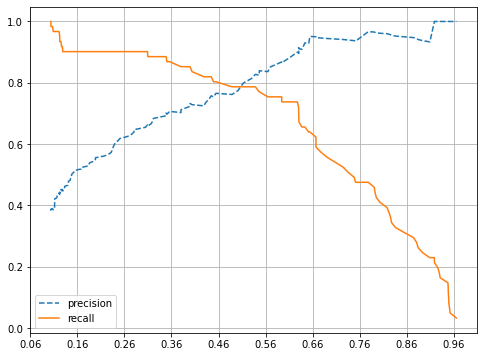

In [33]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

In [37]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('f1 스코어:', np.round(f1,4))

f1 스코어: 0.7805


In [41]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
print('반환된 분류결정 임계값 배열 shape:', thresholds.shape)

thr_index = np.arange(1, thresholds.shape[0], 5)
print('index 10개:', thr_index)
print('샘플 10개 임계값:', np.round(thresholds[thr_index],3))
print('샘플 FPR:', np.round(fprs[thr_index],3))
print('샘플 TPR:', np.round(tprs[thr_index],3))

반환된 분류결정 임계값 배열 shape: (53,)
index 10개: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 10개 임계값: [0.965 0.654 0.63  0.565 0.455 0.38  0.309 0.129 0.123 0.112 0.104]
샘플 FPR: [0.    0.017 0.034 0.076 0.127 0.186 0.237 0.576 0.619 0.754 0.814]
샘플 TPR: [0.033 0.639 0.705 0.754 0.803 0.852 0.902 0.902 0.951 0.967 1.   ]


In [43]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(x_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('roc auc 값:', np.round(roc_score,4))

roc auc 값: 0.9024
